In [1]:
from openpyxl import load_workbook
import pandas as pd

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.drop(df.index[501:768], inplace = True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
496,5,110,68,0,0,26.0,0.292,30,0
497,2,81,72,15,76,30.1,0.547,25,0
498,7,195,70,33,145,25.1,0.163,55,1
499,6,154,74,32,193,29.3,0.839,39,0


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
d_train = df[['Glucose','BloodPressure','Insulin']].reset_index(drop=True)
d_train

,Glucose,BloodPressure,Insulin
0,148,72,0
1,85,66,0
2,183,64,0
3,89,66,94
4,137,40,168
...,...,...,...
496,110,68,0
497,81,72,76
498,195,70,145
499,154,74,193


In [6]:
#import library yang akan digunakan
from IPython.display import Image
from sklearn.impute import SimpleImputer
from sklearn import tree
from subprocess import check_call
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np

In [7]:
d_train = df[['Glucose','BloodPressure','Insulin']].reset_index(drop=True)
d_train

,Glucose,BloodPressure,Insulin
0,148,72,0
1,85,66,0
2,183,64,0
3,89,66,94
4,137,40,168
...,...,...,...
496,110,68,0
497,81,72,76
498,195,70,145
499,154,74,193


In [8]:
for index, row in d_train.iterrows():
    if row['Glucose'] < 100:
        d_train.loc[index, 'Status'] = 'Normal'
    elif row['Glucose'] <= 125:
        d_train.loc[index, 'Status'] = 'Prediabetes'
    else:
        d_train.loc[index, 'Status'] = 'Diabetes'
d_train

,Glucose,BloodPressure,Insulin,Status
0,148,72,0,Diabetes
1,85,66,0,Normal
2,183,64,0,Diabetes
3,89,66,94,Normal
4,137,40,168,Diabetes
...,...,...,...,...
496,110,68,0,Prediabetes
497,81,72,76,Normal
498,195,70,145,Diabetes
499,154,74,193,Diabetes


In [9]:
y = d_train['Status'].values
y

array(['Diabetes', 'Normal', 'Diabetes', 'Normal', 'Diabetes',
       'Prediabetes', 'Normal', 'Prediabetes', 'Diabetes', 'Prediabetes',
       'Prediabetes', 'Diabetes', 'Diabetes', 'Diabetes', 'Diabetes',
       'Prediabetes', 'Prediabetes', 'Prediabetes', 'Prediabetes',
       'Prediabetes', 'Diabetes', 'Normal', 'Diabetes', 'Prediabetes',
       'Diabetes', 'Prediabetes', 'Diabetes', 'Normal', 'Diabetes',
       'Prediabetes', 'Prediabetes', 'Diabetes', 'Normal', 'Normal',
       'Prediabetes', 'Prediabetes', 'Diabetes', 'Prediabetes', 'Normal',
       'Prediabetes', 'Diabetes', 'Diabetes', 'Prediabetes', 'Diabetes',
       'Diabetes', 'Diabetes', 'Diabetes', 'Normal', 'Prediabetes',
       'Prediabetes', 'Prediabetes', 'Prediabetes', 'Normal', 'Diabetes',
       'Diabetes', 'Normal', 'Diabetes', 'Prediabetes', 'Diabetes',
       'Prediabetes', 'Normal', 'Diabetes', 'Normal', 'Diabetes',
       'Prediabetes', 'Normal', 'Prediabetes', 'Prediabetes', 'Normal',
       'Diabetes', 'Pre

In [10]:
columns = ['BloodPressure', 'Insulin']
features = d_train[list(columns)].values
features

array([[ 72,   0],
       [ 66,   0],
       [ 64,   0],
       ...,
       [ 70, 145],
       [ 74, 193],
       [ 90,  71]], dtype=int64)

In [11]:
imputer = SimpleImputer(missing_values= np.NAN, strategy= 'mean', fill_value=None, verbose=0, copy=True)
x = imputer.fit_transform(features)
x

array([[ 72.,   0.],
       [ 66.,   0.],
       [ 64.,   0.],
       ...,
       [ 70., 145.],
       [ 74., 193.],
       [ 90.,  71.]])

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [13]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(x_train, y_train)
predict = clf.predict(x_test)

In [14]:
with open("Graph_tree.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f, feature_names = columns, filled=True, rounded=True, special_characters = True)

In [15]:
check_call(['dot', '-Tpng', 'Graph_tree.dot', '-o', 'Graph_tree.png'])

0

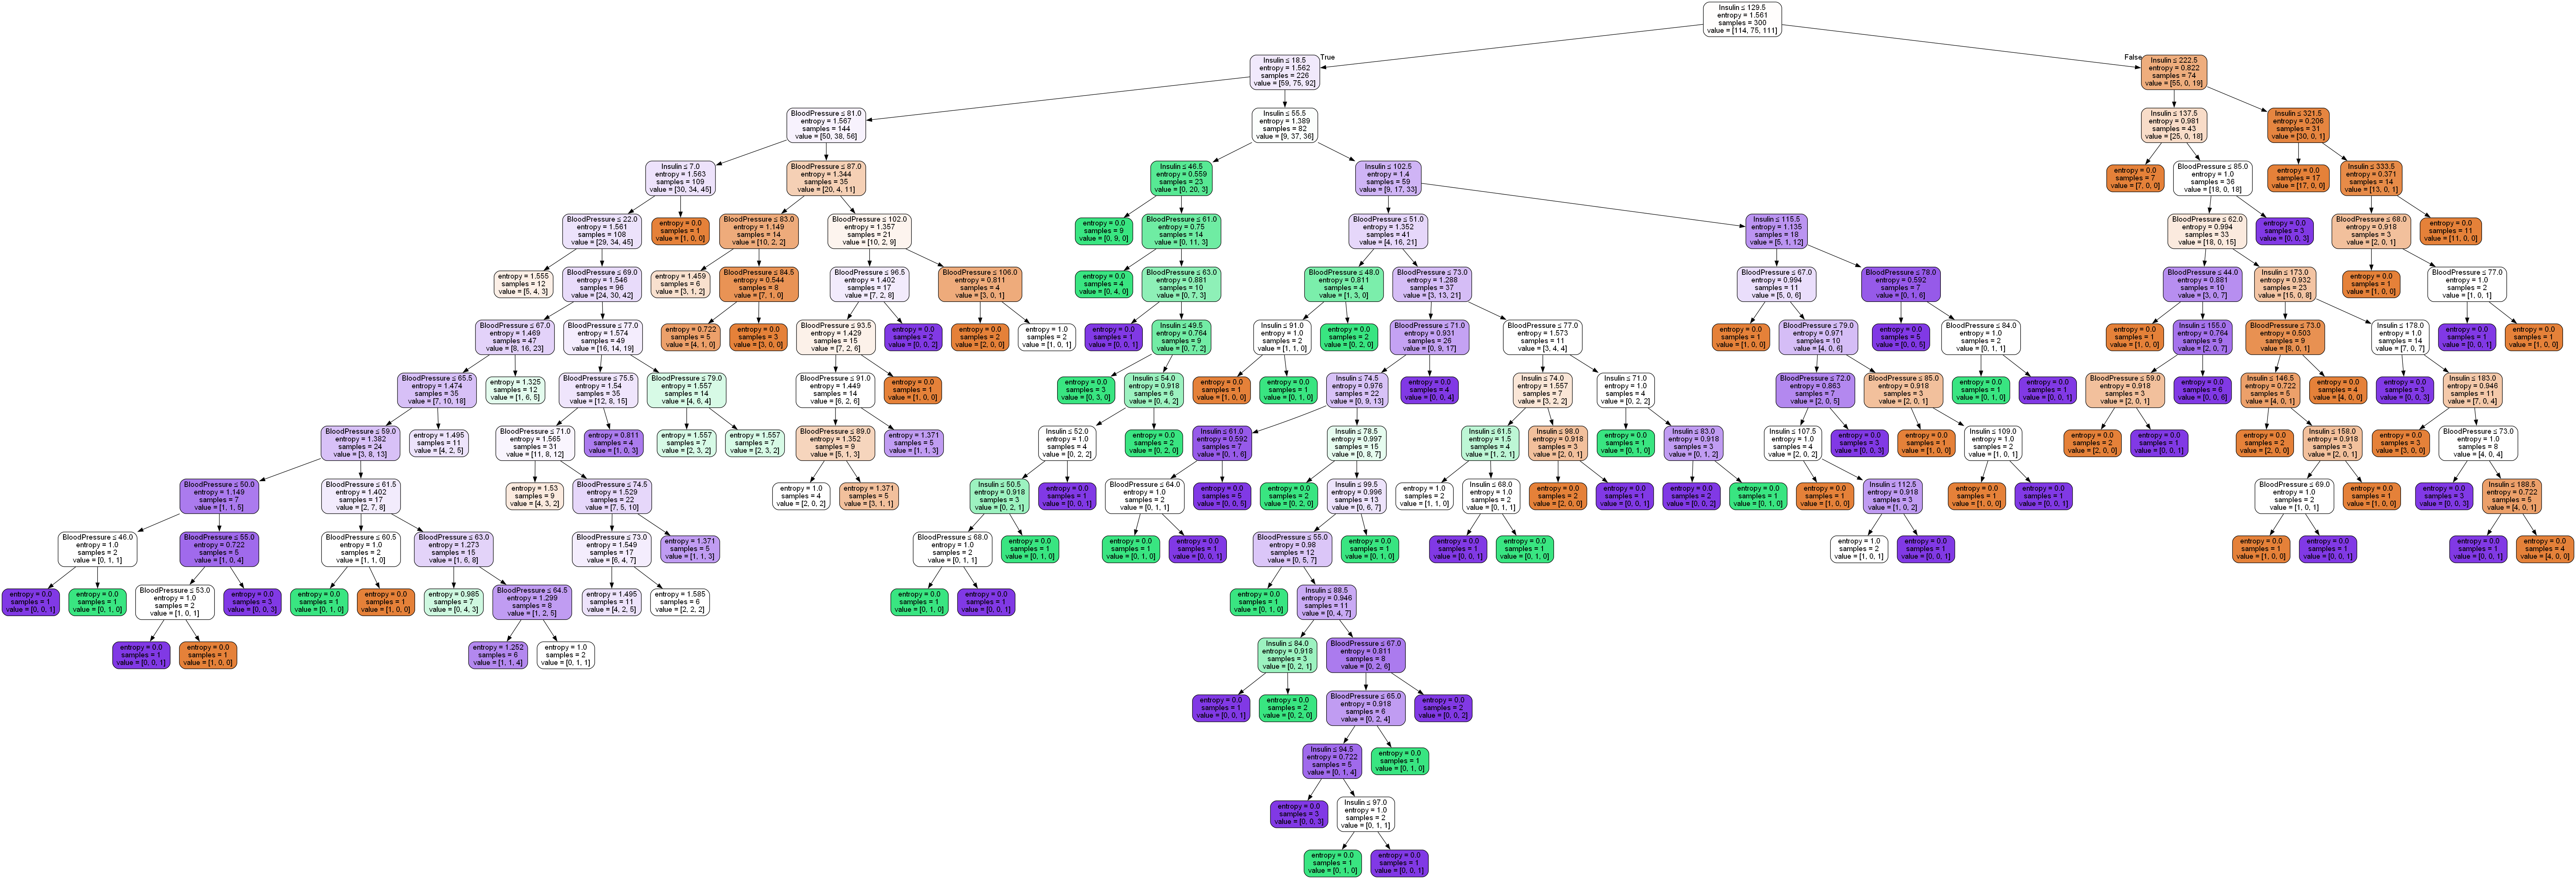

In [16]:
Image(filename='Graph_tree.png')

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='.0f', ax=ax)
plt.xlabel("predict")
plt.ylabel("actual")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

    Diabetes       0.48      0.49      0.49        87
      Normal       0.38      0.42      0.40        48
 Prediabetes       0.32      0.29      0.30        66

    accuracy                           0.41       201
   macro avg       0.39      0.40      0.40       201
weighted avg       0.40      0.41      0.41       201



In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict)

0.4079601990049751